## Sim Demo

### Imports

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from env.imports import *

In [ ]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run)
importlib.reload(models.train_val)
importlib.reload(data.data_utils)


#### Check job specs

In [ ]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

In [ ]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


In [ ]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

In [ ]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

### Model Parameter Counts

#### **Linear Models**
- **PCA Bilinear:** 730  _(27 PCs)_
- **PLS Bilinear:** 101  _(10 PLS components)_
- **Bilinear Low-rank:** 73,800  _(rank 10)_
- **PLS MLP:** 158,993  _(10 PLS components, including PLS projection matrices)_
- **PCA MLP:** 47,873  _(27 PCs, 2-layer)_

---

#### **MLP and SMT Models**

#### 2-Layer Models
- **MLP:** 3,812,609
- **SMT:** 1,399,947
- **MLP w/ CLS:** 3,814,145
- **SMT w/ CLS:** 1,405,579

#### 3-Layer Models
- **MLP:** 7,723,777
- **SMT:** 2,162,315
- **MLP w/ CLS:** 7,726,849
- **SMT w/ CLS:** 2,173,067

---

### Coord MLP Parameter Counts
- **[32]:** 321
- **[64, 32]:** 2,753
- **[128, 64]:** 9,601
- **[256, 128]:** 35,685
- **[512, 256, 128]:** 169,729

In [ ]:
torch._dynamo.reset()

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
X_cell_types_Jorstad shape: (455, 24)
X_cell_types_LakeDFC shape: (455, 18)
X_cell_types_LakeVIS shape: (455, 18)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: 9b538o9k
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/9b538o9k
Initialized sweep with ID: 9b538o9k
2
3
4
BEST CONFIG {'input_dim': 14760, 'token_encoder_dim': 20, 'd_model': 128, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [256, 128, 64], 'transformer_dropout': 0.1, 'dropout_rate': 0.1, 'learning_rate': 0.0005, 'weight_decay': 1e-05, 'batch_size': 1024, 'aug_prob': 0.3, 'epochs': 100, 'num_workers': 2, 'prefetch_factor': 4}


  warnings.warn(

  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Number of learnable parameters in SMT model: 841858


  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 7.15 GB
Best val loss so far at epoch 1: 0.0534
Best val loss so far at epoch 2: 0.0322
Epoch 5/100, Train Loss: 0.0515, Val Loss: 0.0342, Time: 10.97s
Best val loss so far at epoch 6: 0.0292
Best val loss so far at epoch 9: 0.0290
Epoch 10/100, Train Loss: 0.0336, Val Loss: 0.0782, Time: 10.97s
Best val loss so far at epoch 11: 0.0246
Best val loss so far at epoch 13: 0.0179
Epoch 15/100, Train Loss: 0.0251, Val Loss: 0.0257, Time: 10.89s
Epoch 20/100, Train Loss: 0.0203, Val Loss: 0.0291, Time: 10.87s
Best val loss so far at epoch 23: 0.0160
Epoch 25/100, Train Loss: 0.0156, Val Loss: 0.0295, Time: 10.18s
Epoch 30/100, Train Loss: 0.0172, Val Loss: 0.0204, Time: 10.31s
Best val loss so far at epoch 35: 0.0153
Epoch 35/100, Train Loss: 0.0136, Val Loss: 0.0153, Time: 10.23s
Epoch 40/100, Train Loss: 0.0153, Val Loss: 0.0165, Time: 10.33s
Best val loss so far at epoch 43: 0.0151
Epoch 45/100, Train Loss: 0.0153, Val Lo

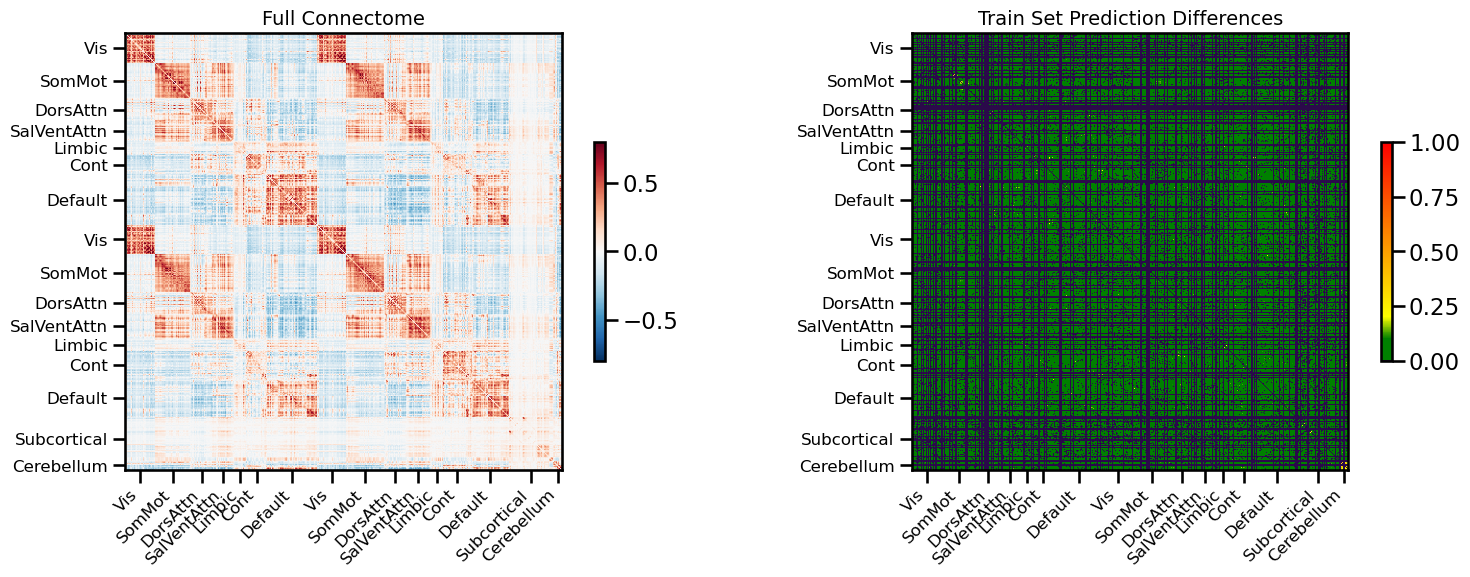

<Figure size 640x480 with 0 Axes>

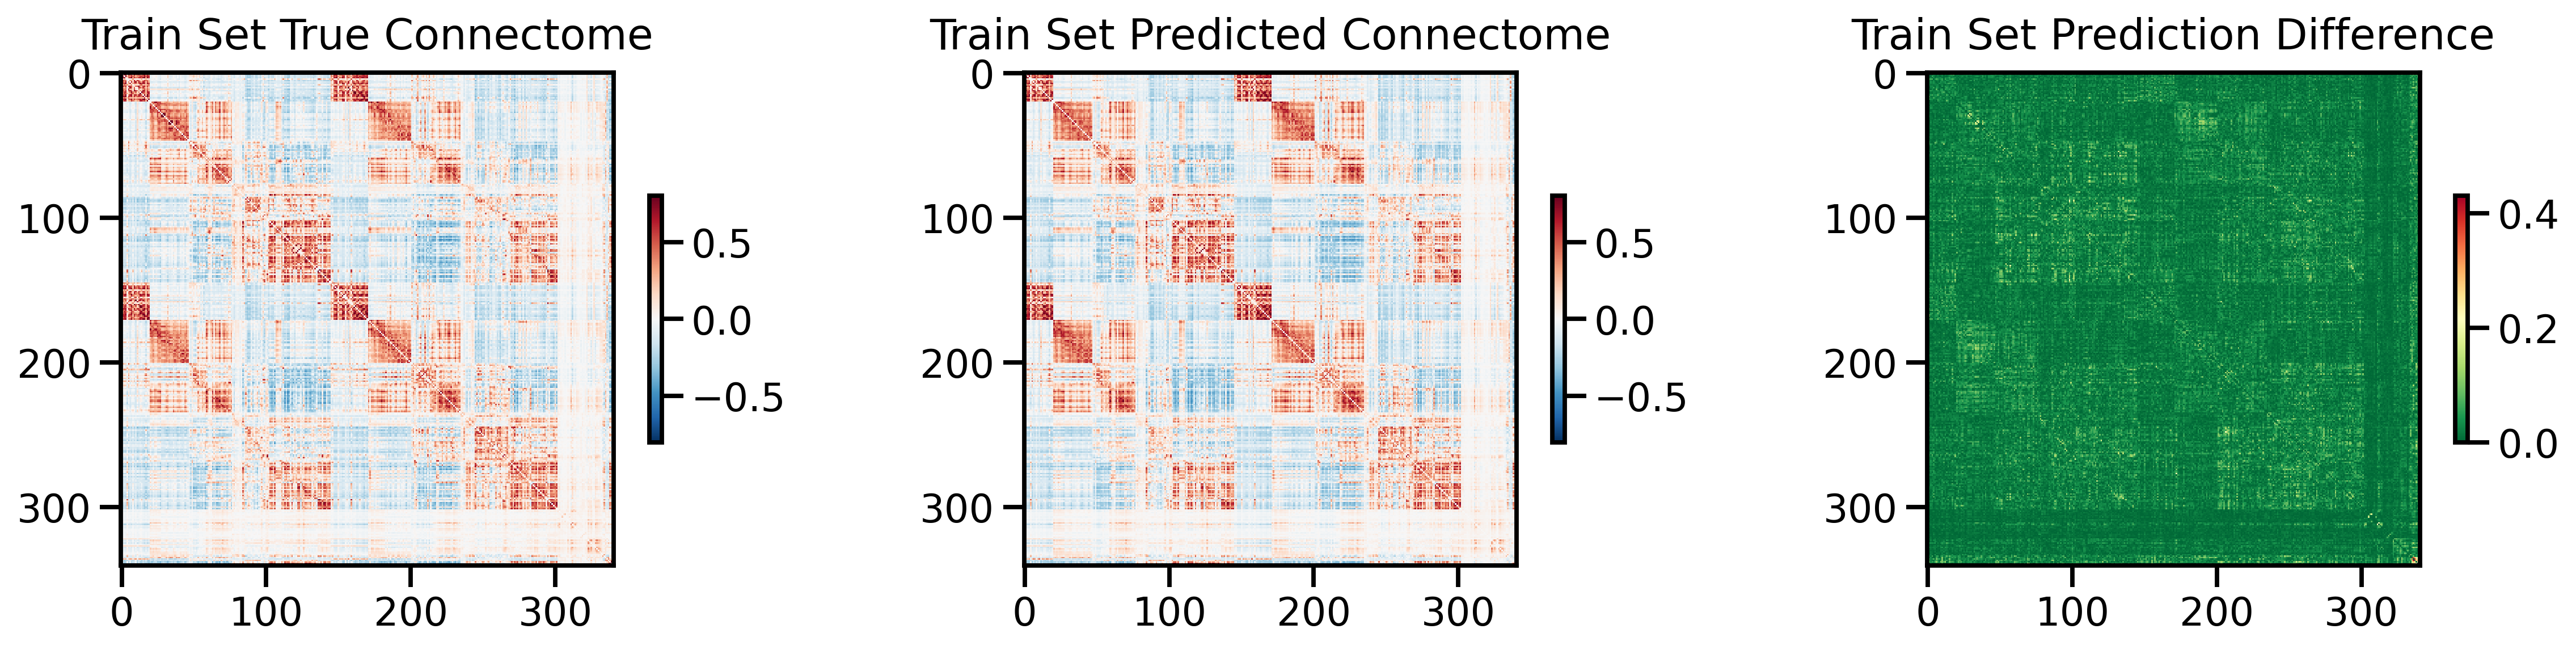

<Figure size 640x480 with 0 Axes>

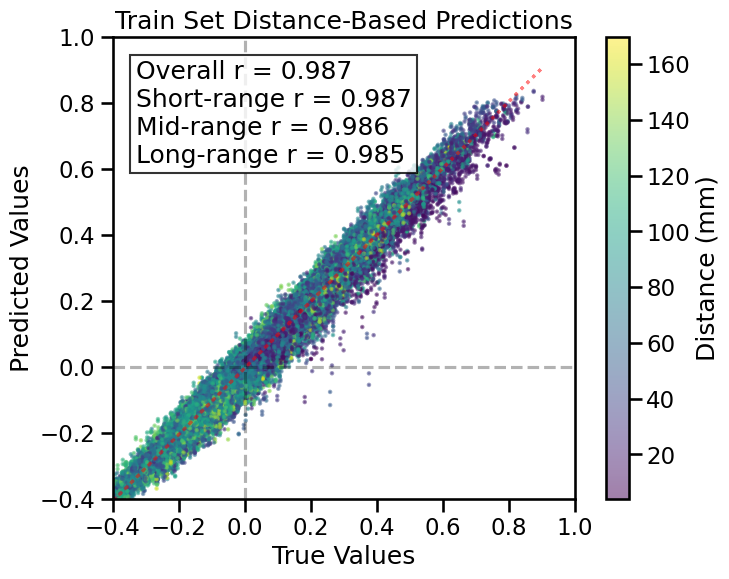

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 114 regions, 12882 connections


<Figure size 640x480 with 0 Axes>

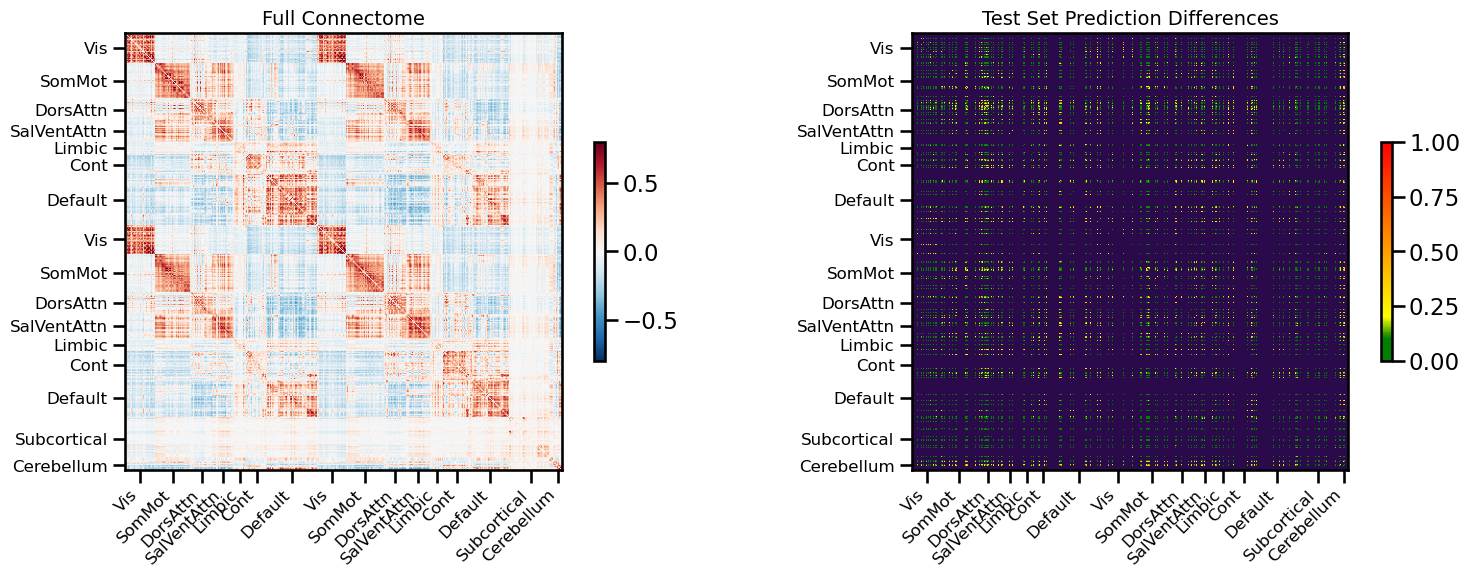

<Figure size 640x480 with 0 Axes>

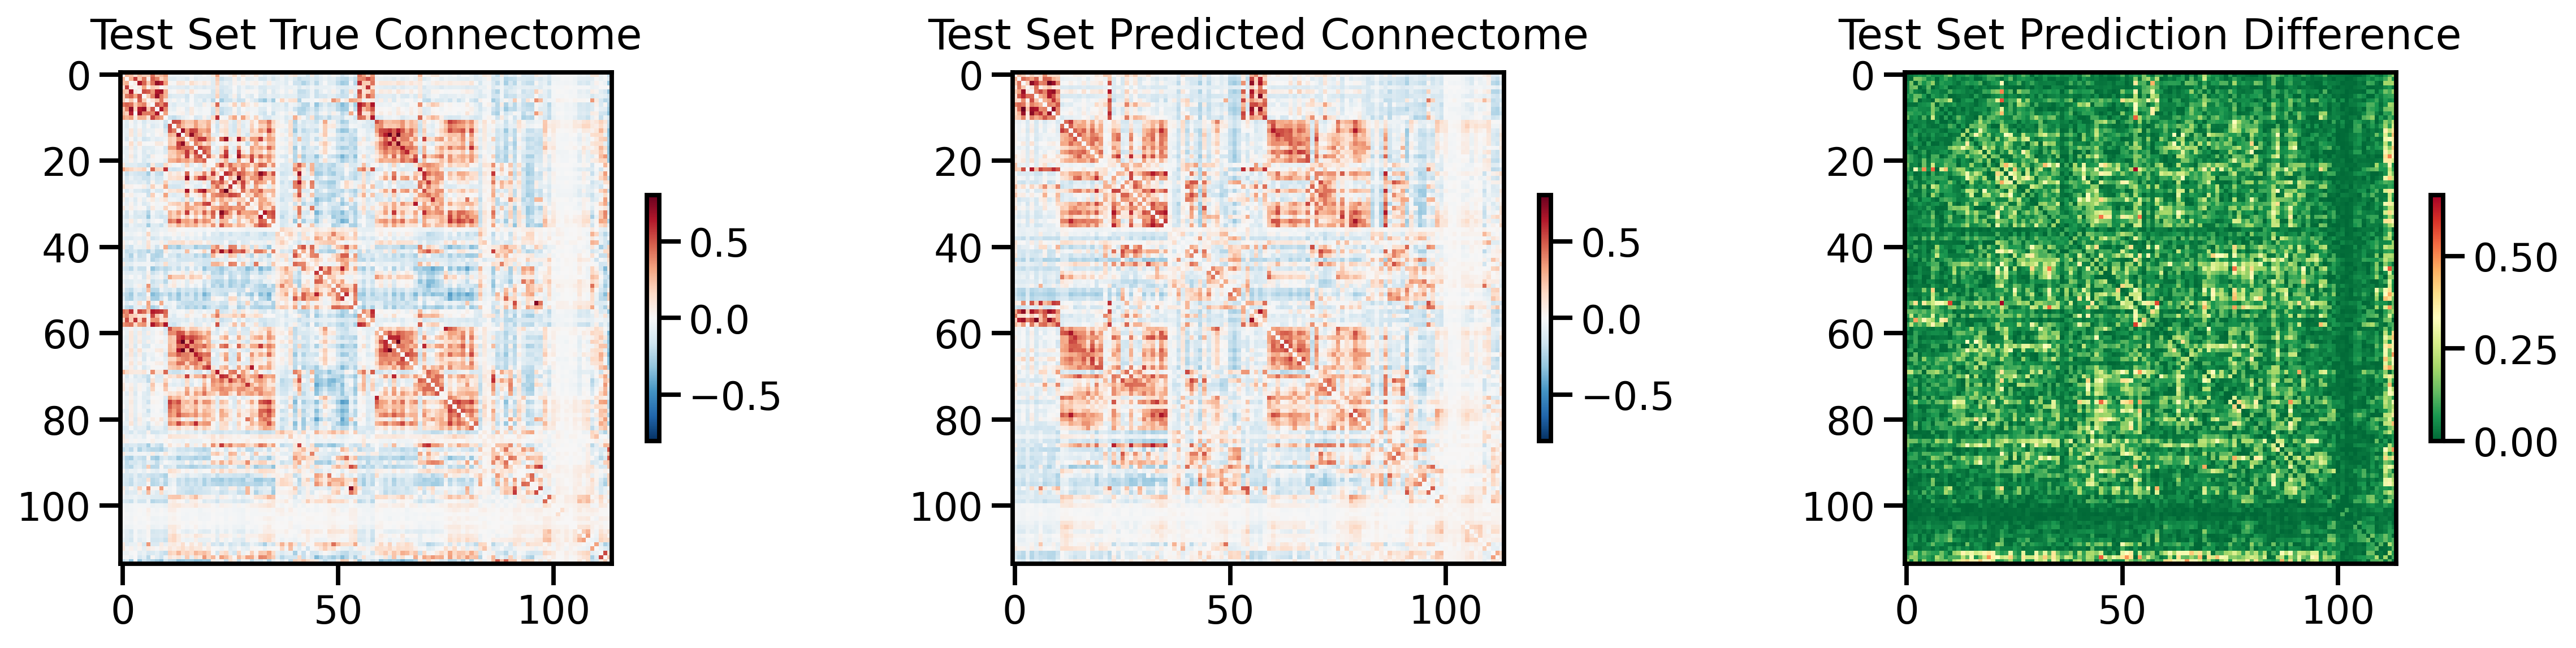

<Figure size 640x480 with 0 Axes>

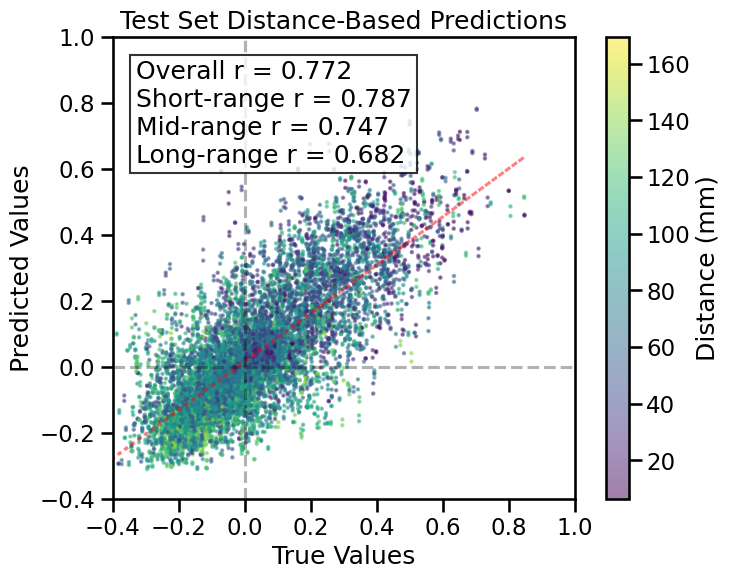

TRAIN METRICS
GLOBAL: mse=0.000926, mae=0.022593, r2=0.9727, pearson_r=0.9870, spearman_r=0.9818, geodesic_distance=13.6515
DISTANCE-BASED: short=0.9873, mid=0.9859, long=0.9853
HEMISPHERIC: left=0.9859, right=0.9883, inter=0.9873
CONNECTION STRENGTH: neg=0.8136, weak=0.9753, pos=0.9276
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.9863    0.9868
  Default       0.9780    0.9844
  SalVentAttn    0.9833    0.9868
  Limbic        0.9863    0.9885
  DorsAttn      0.9876    0.9899
  SomMot        0.9912    0.9883
  Vis           0.9921    0.9900
  Subcortical    0.9815    0.9852
  Cerebellum    0.9850    0.9826

TEST METRICS
GLOBAL: mse=0.014319, mae=0.084523, r2=0.5626, pearson_r=0.7723, spearman_r=0.7332, geodesic_distance=11.2139
DISTANCE-BASED: short=0.7874, mid=0.7470, long=0.6821
HEMISPHERIC: left=0.7598, right=0.7988, inter=0.7724
CONNECTION STRENGTH: neg=-0.0845, weak=0.6669, pos=0.4296
NETWORK CORRELATIONS:
  NETWORK      

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 10.5%
RAM Usage: 17.3%
Available RAM: 1.2T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% | 10% |
Sim complete
Simulation completed in 1104.76 seconds (18.41 minutes)


13224

<Figure size 640x480 with 0 Axes>

In [30]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=True,
              skip_cv=True,
              model_type='shared_transformer_pool',
              use_gpu=True,
              null_model='none',
              use_folds=[0]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
X_cell_types_Jorstad shape: (455, 24)
X_cell_types_LakeDFC shape: (455, 18)
X_cell_types_LakeVIS shape: (455, 18)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: 2h2pumhm
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/2h2pumhm
Initialized sweep with ID: 2h2pumhm


  warnings.warn(

  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



2
3
4
BEST CONFIG {'input_dim': 14760, 'token_encoder_dim': 60, 'd_model': 64, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [256, 128, 64], 'cls_init': 'spatial_learned', 'transformer_dropout': 0.1, 'dropout_rate': 0.1, 'learning_rate': 0.0003, 'weight_decay': 1e-05, 'batch_size': 1024, 'aug_prob': 0.3, 'epochs': 100, 'num_workers': 2, 'prefetch_factor': 4}
Number of learnable parameters in SMT w/ CLS pooled model: 264770


  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 7.15 GB
Best val loss so far at epoch 1: 0.0400
Best val loss so far at epoch 2: 0.0329
Best val loss so far at epoch 3: 0.0283
Best val loss so far at epoch 4: 0.0270
Best val loss so far at epoch 5: 0.0251
Epoch 5/100, Train Loss: 0.0510, Val Loss: 0.0251, Time: 5.08s
Best val loss so far at epoch 6: 0.0233
Best val loss so far at epoch 9: 0.0208
Epoch 10/100, Train Loss: 0.0352, Val Loss: 0.0224, Time: 6.05s
Best val loss so far at epoch 12: 0.0199
Best val loss so far at epoch 14: 0.0191
Epoch 15/100, Train Loss: 0.0360, Val Loss: 0.0251, Time: 6.19s
Epoch 20/100, Train Loss: 0.0321, Val Loss: 0.0206, Time: 6.15s
Best val loss so far at epoch 23: 0.0181
Best val loss so far at epoch 25: 0.0180
Epoch 25/100, Train Loss: 0.0262, Val Loss: 0.0180, Time: 6.15s
Best val loss so far at epoch 26: 0.0164
Best val loss so far at epoch 28: 0.0164
Epoch 30/100, Train Loss: 0.0248, Val Loss: 0.0195, Time: 7.08s
Best val loss s

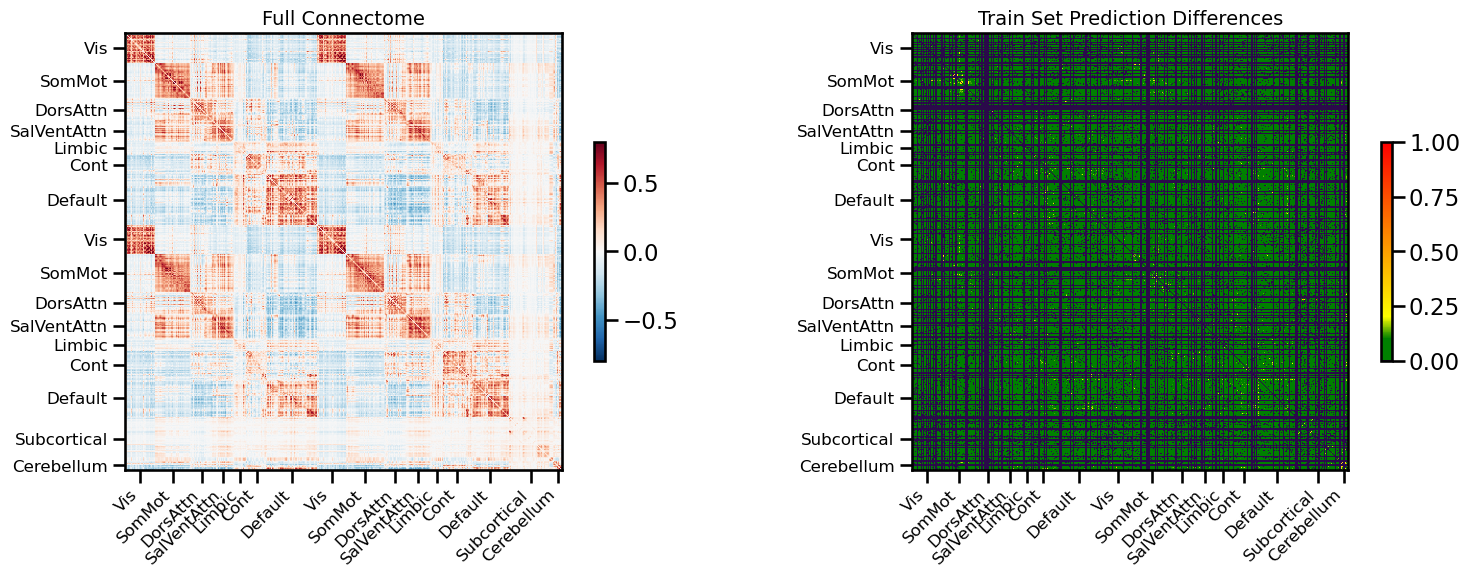

<Figure size 640x480 with 0 Axes>

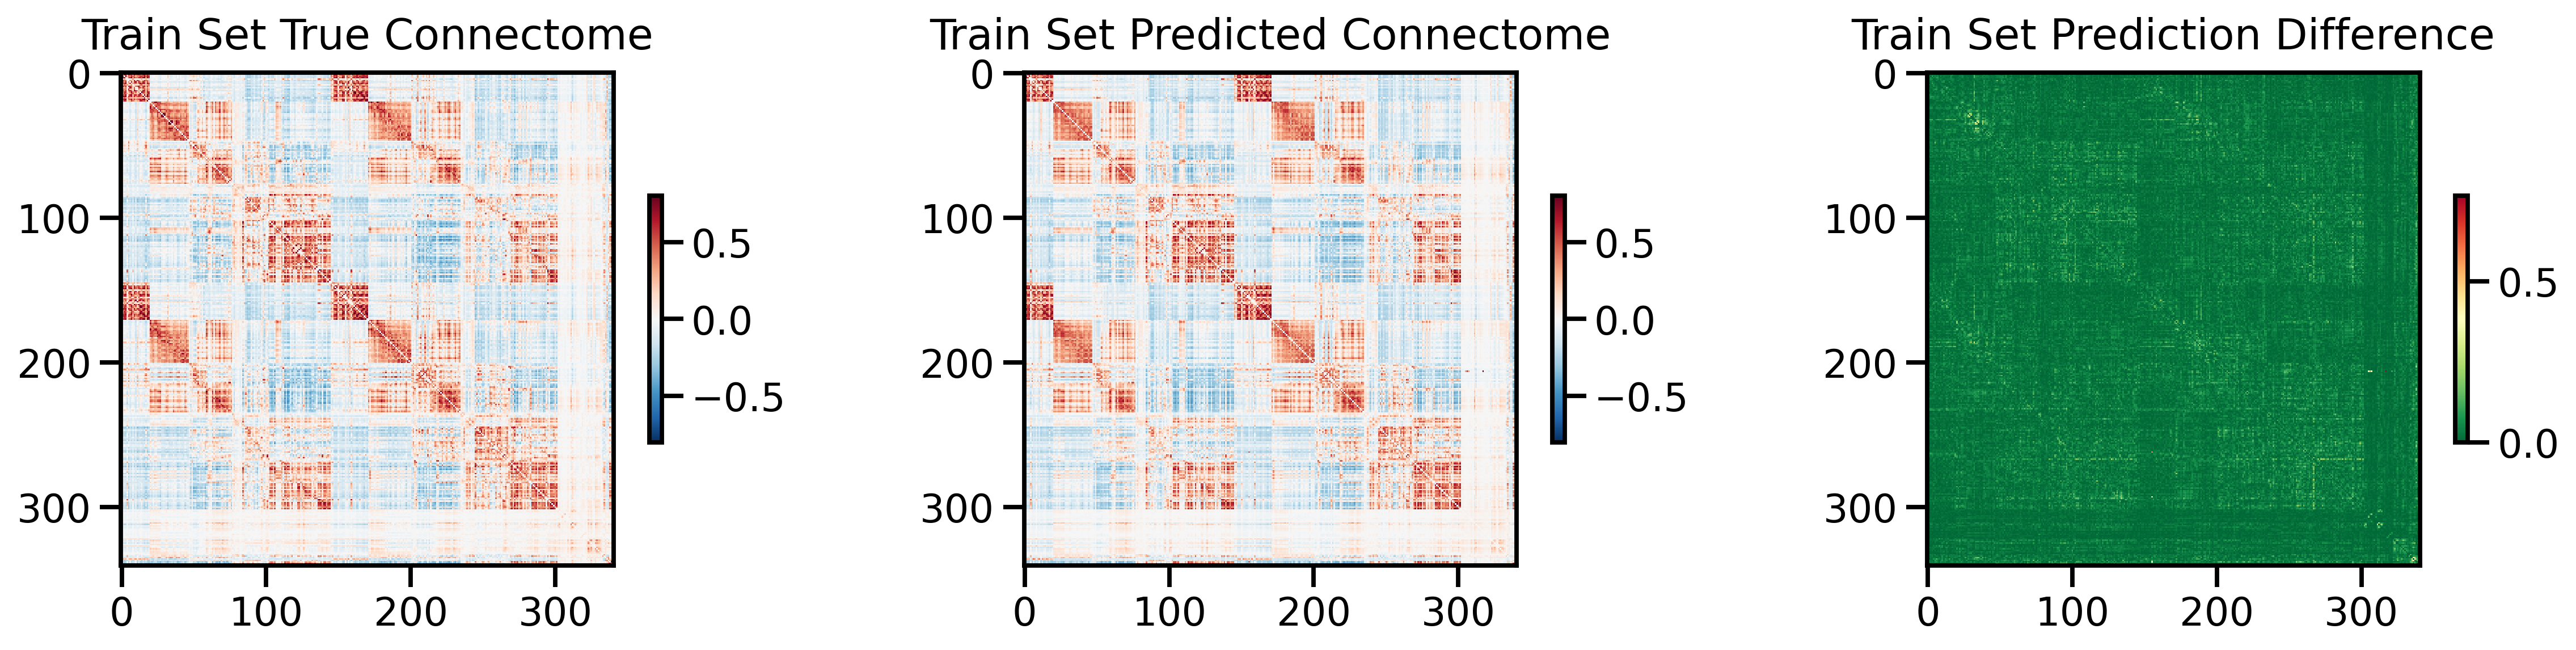

<Figure size 640x480 with 0 Axes>

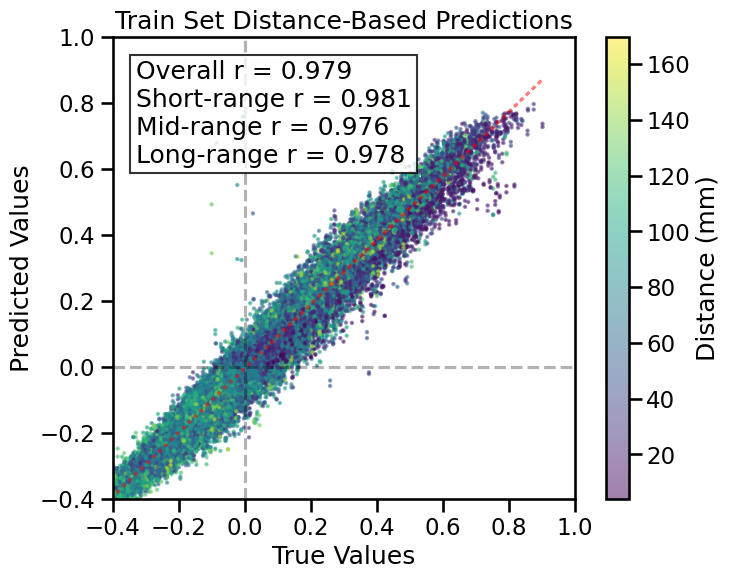

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 114 regions, 12882 connections


<Figure size 640x480 with 0 Axes>

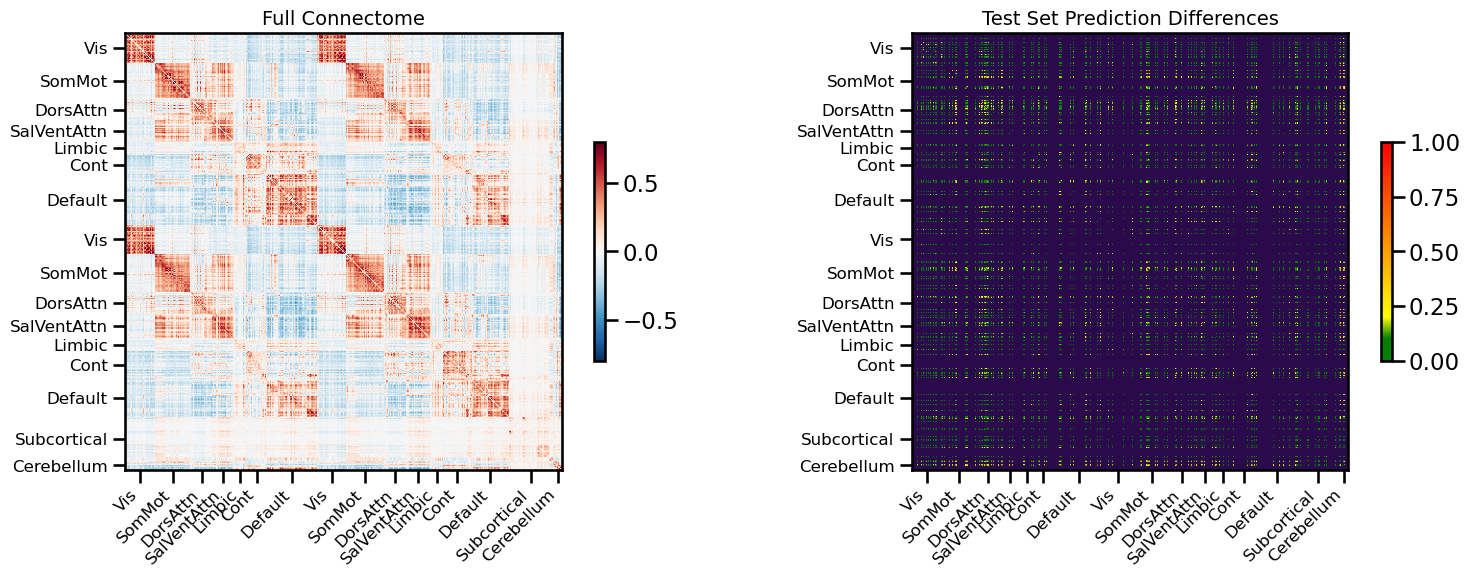

<Figure size 640x480 with 0 Axes>

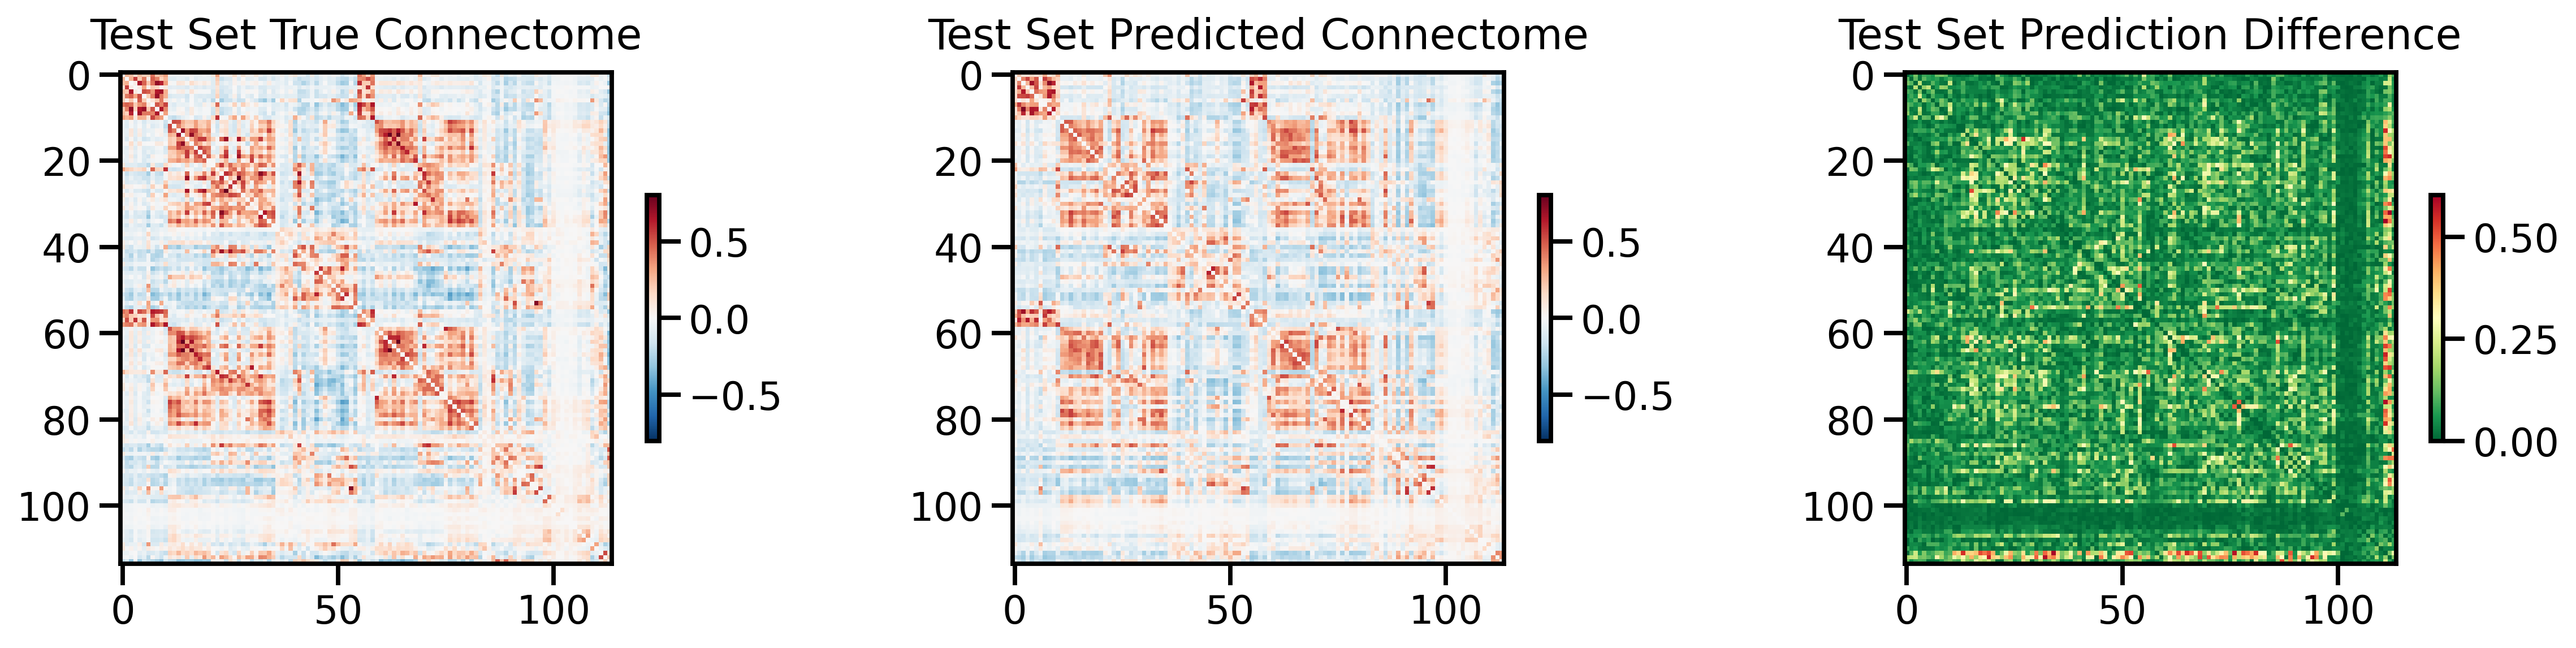

<Figure size 640x480 with 0 Axes>

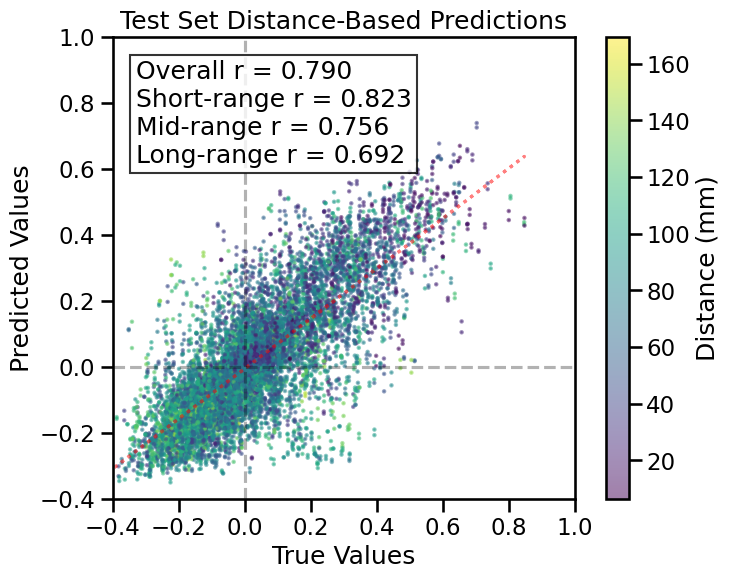

TRAIN METRICS
GLOBAL: mse=0.001428, mae=0.027777, r2=0.9578, pearson_r=0.9791, spearman_r=0.9710, geodesic_distance=14.2362
DISTANCE-BASED: short=0.9811, mid=0.9756, long=0.9782
HEMISPHERIC: left=0.9792, right=0.9787, inter=0.9796
CONNECTION STRENGTH: neg=0.7343, weak=0.9603, pos=0.8856
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.9750    0.9774
  Default       0.9665    0.9752
  SalVentAttn    0.9693    0.9772
  Limbic        0.9832    0.9814
  DorsAttn      0.9778    0.9825
  SomMot        0.9867    0.9817
  Vis           0.9889    0.9844
  Subcortical    0.9701    0.9772
  Cerebellum    0.9599    0.9745

TEST METRICS
GLOBAL: mse=0.013392, mae=0.079310, r2=0.5909, pearson_r=0.7896, spearman_r=0.7600, geodesic_distance=9.7276
DISTANCE-BASED: short=0.8234, mid=0.7556, long=0.6921
HEMISPHERIC: left=0.7708, right=0.8237, inter=0.7929
CONNECTION STRENGTH: neg=0.2545, weak=0.6867, pos=0.4775
NETWORK CORRELATIONS:
  NETWORK      IN

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 4.0%
RAM Usage: 16.4%
Available RAM: 1.2T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |
Sim complete
Simulation completed in 601.34 seconds (10.02 minutes)


13482

<Figure size 640x480 with 0 Axes>

In [32]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 4),
              track_wandb=True,
              skip_cv=True,
              model_type='shared_transformer_cls_pool',
              use_gpu=True,
              null_model='none',
              use_folds=[0]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()

In [ ]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 4),
              track_wandb=True,
              skip_cv=True,
              model_type='shared_transformer_conv',
              use_gpu=True,
              null_model='none',
              use_folds=[0]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()